In [2]:
import itertools
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm
from dataclasses import asdict, dataclass, field
import vsketch
import shapely.geometry as sg
from shapely.geometry import box, MultiLineString, Point, MultiPoint, Polygon, MultiPolygon, LineString
import shapely.affinity as sa
import shapely.ops as so
import matplotlib.pyplot as plt
import pandas as pd

import vpype_cli
from typing import List, Generic
from genpen import genpen as gp, utils as utils
from scipy import stats as ss
import geopandas
from shapely.errors import TopologicalError
import functools
%load_ext autoreload
%autoreload 2
import vpype
from skimage import io
from pathlib import Path

from sklearn.preprocessing import minmax_scale
from skimage import feature
from genpen.utils import Paper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# make page
paper_size = '5x7 inches'
border:float=20
paper = Paper('7x5 inches')

drawbox = paper.get_drawbox(border)

In [46]:
(xbins, ybins), (xs, ys) = gp.overlay_grid(drawbox, xstep=35, ystep=30, flatmesh=True)

In [47]:
points = [Point(x,y) for x,y in itertools.product(xs,ys)]

In [130]:
point = Point((0,0))
rp = 

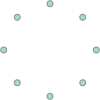

In [132]:
gp.RegPolygon(point=point, radius=1, n_corners=8).corners

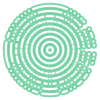

In [113]:
p = point.buffer(np.random.uniform(3, 5))
stp = gp.ScaleTransPrms(d_buffer=-0.5,angles=-45,d_translate_factor=0.)
P = gp.Poly(p)
P.fill_scale_trans(**stp.prms)

buffer_factor = 1e-4
cs=2
js=1
r = 4
mfills = []
for f in P.fill:
    dilated = f.buffer(buffer_factor, cap_style=cs, join_style=js, resolution=r)
    eroded = dilated.buffer(-buffer_factor, cap_style=cs, join_style=js, resolution=r)
    mfills.append(eroded)

mfills = gp.merge_Polygons(mfills)
mfills.buffer(0.2, cap_style=2, join_style=1, resolution=4).boundary

In [124]:
mazes = []
for point in points:
    p = point.buffer(np.random.uniform(8, 16))
    stp = gp.ScaleTransPrms(d_buffer=-3,angles=-45,d_translate_factor=0.)
    P = gp.Poly(p)
    P.fill_scale_trans(**stp.prms)

    buffer_factor = 1e-4
    cs=2
    js=1
    r = 4
    mfills = []
    for f in P.fill:
        dilated = f.buffer(buffer_factor, cap_style=cs, join_style=js, resolution=r)
        eroded = dilated.buffer(-buffer_factor, cap_style=cs, join_style=js, resolution=r)
        mfills.append(eroded)

    mfills = gp.merge_Polygons(mfills)
    buffs = mfills.buffer(0.2, cap_style=2, join_style=1, resolution=4).boundary
    filtered_buffs = gp.merge_LineStrings([f for f in buffs if f.length>0.1])
    mazes.append(filtered_buffs)
mazes = gp.merge_LineStrings(mazes)

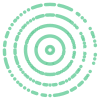

In [125]:
filtered_buffs

In [126]:
layers = []
layers.append(mazes)

In [127]:
sk = vsketch.Vsketch()
sk.size(paper.page_format_mm)
sk.scale('1mm')
sk.penWidth('0.1mm')
for i, layer in enumerate(layers):
    sk.stroke(i+1)
    sk.geometry(layer)

# tolerance=0.5
# sk.vpype(f'linemerge --tolerance {tolerance}mm linesort')

sk.display()

<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2021-01-03T13:22:31.489488 
 
 
 
 
 
 <polygon points="192.4484,132.218 192.4283,132.285 192.4283,132.285 192.4559,132.5741 192.5904,132.8314 192.812,133.0191 193.088,133.1093 193.3777,133.0888 193.6383,132.9607 193.8313,132.7437 193.9283,132.47 193.9283,132.47 193.9328,132.4332 193.9328,132.4331 193.9356,132.3961 193.9356,132.3961 193.9213,132.2976 193.9451,132.2025 194.206,126.8909 194.2013,126.8543 194.206,126.8159 194.0066,122.7576 193.935,122.4715 193.7593,122.2346 193.5063,122.0829 193.3755,122.0635 193.5163,122.025 193.7468,121.8485 193.8938,121.5981 193.9356,121.3107 193.9356,121.3107 193.9328,121.2737 193.9328,121.2736 193.9283,121.2368 193.9283,121.2368 193.8313,120.9631 193.6383,120.7462 193.3777,120.618 193.088,120.5975 192.812,120.6878 192.5904,120.8754 192.4559,121.1327 192.4283,121.4218 192.4283,121.4219 192.5117,121.7 192.6939,121.9262 192.9479,122.067 193.0544,122.0798 192.9285,122.1113 192.6916,122.287 192.5399,122.54 192.4966,122.8318 192.6942,126.8534 192.4351,132.1284"/>
 <polygon points="190.3052,110.7302 190.2991,110.7317 191.3239,114.8228 191.45,115.0894 191.6685,115.2875 191.8609,115.3563 191.7381,115.4829 191.6295,115.7522 191.6304,116.0426 191.6304,116.0426 191.7407,116.3112 191.9441,116.5185 192.2107,116.6337 192.501,116.6399 192.7722,116.5362 192.9844,116.338 193.1061,116.0743 193.1195,115.7842 193.1195,115.7842 193.1131,115.7477 193.1131,115.7477 193.105,115.7115 193.105,115.7114 192.9816,115.4486 192.7683,115.2516 192.57,115.1772 192.7055,115.0277 192.8049,114.75 192.7904,114.4555 191.7656,110.3644 191.7557,110.3286 191.7557,110.3286 191.7441,110.2934 191.7441,110.2934 191.5956,110.0438 191.3639,109.8687 191.0833,109.7938 190.7952,109.8303 190.5421,109.9726 190.3614,110.1999 190.2797,110.4785"/>
 <polygon points="190.3052,142.9766 190.2797,143.2283 190.3614,143.5069 190.5421,143.7342 190.7952,143.8765 191.0833,143.913 191.3639,143.8381 191.5956,143.663 191.7441,143.4134 191.7441,143.4134 191.7557,143.3782 191.7557,143.3782 191.7656,143.3424 192.7904,139.2513 192.8049,138.9568 192.7055,138.6791 192.57,138.5296 192.7683,138.4552 192.9816,138.2583 193.105,137.9954 193.105,137.9954 193.1131,137.9592 193.1131,137.9591 193.1195,137.9226 193.1195,137.9226 193.1061,137.6325 192.9844,137.3689 192.7722,137.1706 192.501,137.0669 192.2107,137.0731 191.9441,137.1883 191.7407,137.3956 191.6304,137.6642 191.6304,137.6642 191.6295,137.9546 191.7381,138.2239 191.8609,138.3505 191.6685,138.4193 191.45,138.6174 191.3239,138.884 190.2991,142.9751"/>
 
 
 
 
 
 
 <polygon points="179.4223,139.9535 179.4213,139.9746 179.461,140.0855 179.498,140.2115 179.5128,140.2303 179.5207,140.2522 179.5987,140.3382 179.6787,140.4388 179.7016,140.4517 179.7188,140.4706 179.8222,140.5195 179.9318,140.5812 179.9602,140.5848 179.9854,140.5967 180.098,140.6022 180.2199,140.6176 180.2498,140.6096 180.28,140.6111 180.3844,140.5737 180.5005,140.5427 180.527,140.5226 180.5576,140.5117 180.6385,140.4384 180.7321,140.3676 180.7503,140.337 180.7761,140.3136 180.822,140.2166 180.8806,140.1181 180.8806,140.1181 180.8923,140.0828 180.8923,140.0828 180.9022,140.047 180.9022,140.047 180.9022,140.047 180.9022,140.047 181.432,137.9319 181.432,137.9319 181.9709,135.7806 181.979,135.7444 181.979,135.7444 181.9853,135.7079 182.6264,131.3859 182.6257,131.3713 182.6307,131.3573 182.6307,131.3573 182.6352,131.3204 182.6352,131.3204 182.638,131.2834 182.8538,126.8909 182.8482,126.8534 182.8538,126.8159 182.638,122.4234 182.6352,122.3864 182.6352,122.3864 182.6307,122.3495 182.6307,122.3495 182.6259,122.3359 182.6266,122.3217 181.9853,117.9989 181.979,117.9624 181.979,117.9624 181.9709,117.9262 181.4411,115.811 181.4411,115.811 180.9022,113.6598 180.9022,113.6598 180.9022,113.6598 180.9022,113.6598 180.8923,113.624 180.8923,113.624 180.8806,113.5888 180.8806,113.5887 180.822,113.4903 180.7761,113.3932 180.7503,113.3698 180.7321,113.3392 180.6385,113.2684 180.5576,113.1951 180.527,113.1842 1